Задание:  
1.+  Загрузить файл hr.csv (можно найти во сложении к заданию)
2.+  Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.+  Рассчитать и визуализировать корреляционную матрицу для переменных
4.+  Визуализировать несколько взаимосвязей между переменными
5.  С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.+  Рассчитать сколько работников работает в каждом департаменте
7.+  Показать распределение сотрудников по зарплатам
8.+  Показать распределение сотрудников по зарплатам совместно с департаментами
9.+  Сколько сотрудников покинули компанию
10.+ Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

,name,mean,median,,mode,min,max,std
0,satisfaction_level,0.612834,0.64,0,0.1,0.09,1,0.248631
1,last_evaluation,0.716102,0.72,0,0.55,0.36,1,0.171169
2,number_project,3.803054,4.00,0,4,2,7,1.232592
3,average_montly_hours,201.050337,200.00,0,135,96,310,49.943099
4,time_spend_company,3.498233,3.00,0,3,2,10,1.460136
5,Work_accident,0.144610,0.00,0,0,0,1,0.351719
6,left,0.238083,0.00,0,0,0,1,0.425924
7,promotion_last_5years,0.021268,0.00,0,0,0,1,0.144281


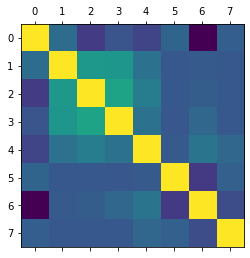

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind


data = pd.read_csv('HR.csv')

# Основные статиститки

mean = data.mean().to_frame().reset_index()
median = data.median().to_frame().reset_index()
mode = data.mode().head(1).unstack().to_frame().reset_index()
min_ = data.min().to_frame().reset_index()
max_ = data.max().to_frame().reset_index()
std_ = data.std().to_frame().reset_index()
mean.columns = ['name','mean']
median.columns = ['name','median']
mode.columns = ['name','','mode']
min_.columns = ['name','min']
max_.columns = ['name','max']
std_.columns = ['name','std']

basic statistics = (mean
                       .merge(median, how='left', on='name')
                       .merge(mode, how='left', on='name')
                       .merge(min_, how='left', on='name')        
                       .merge(max_, how='left', on='name')
                       .merge(std_, how='left', on='name')
                      )


# Расчитать и визуализировать корреляционную матрицу для переменных
plt.matshow(data.corr())

# Кол-во работников в Департаментах
dep_count = data[['satisfaction_level', 'sales']].groupby('sales').count().reset_index()
dep_count.columns = ['sales','p_count']
dep_count.head()


# Распределение сотрудников по Зарплатам
sal_count = data[['satisfaction_level', 'salary']].groupby('salary').count().reset_index()
sal_count.columns = ['salary','p_count']
sal_count.head()

# Распредеелние кол-ва по Зарплатам и Департаментам
ds_count = data[['satisfaction_level', 'sales', 'salary']].groupby(['sales','salary']).count().reset_index()
ds_count.columns = ['sales','salary','p_count']
ds_count.head()

# Кол-во сотрудников покинувших компанию

count_left = data['left'].sum()
count_left




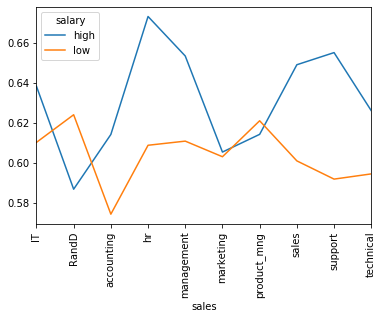

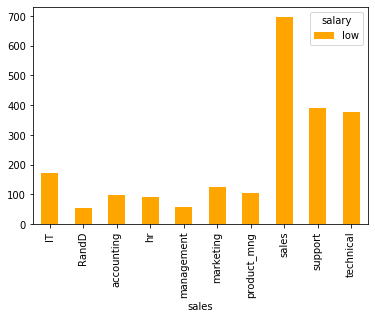

In [119]:
# Несколько визуализаций взаимосвязей.

d_d = data[['sales','salary','satisfaction_level']].groupby(['sales','salary']).mean().reset_index()

p_d = d_d.pivot_table(  index = 'sales',
                        columns = 'salary', 
                        values='satisfaction_level').fillna(0).applymap(float)
p_d.plot(y=['high','low'],rot=90)

# Из графика видно, что работники отделов RanD и PM с низкой ЗП имеют более высокий уровень удовлетворенности,
# чем работники этих же отделов но с высокой ЗП. Вызвано это может быть возможно высокой

f_d = data[['sales','salary','left']].loc[(data.left == 1)].groupby(['sales','salary']).count().reset_index()
f_dp = f_d.pivot_table(  index = 'sales',
                         columns = 'salary', 
                         values ='left').fillna(0).applymap(float)
f_dp.plot(kind='bar', y=['low'], color='orange')

# Рассматривая оба графика видим некоторую взаимосвязь между кол-вом уволившихся и их уровнем удовлетворенности.
# например отдел RandD с высоким уровнем удовлетворенности но с нихкой ЗП уволнялись реже чем в дургих отделах.

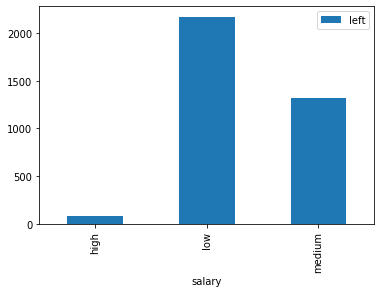

In [186]:

data[['salary','satisfaction_level']].groupby('salary').mean().reset_index().head()
data[['salary','number_project']].groupby('salary').count().reset_index().head()
data[['salary','left']].groupby('salary').sum().reset_index().head()


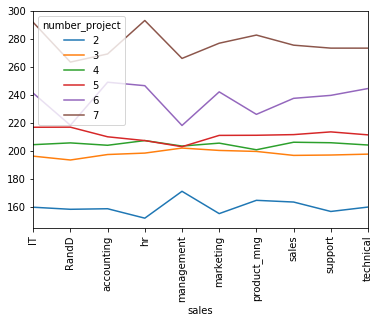

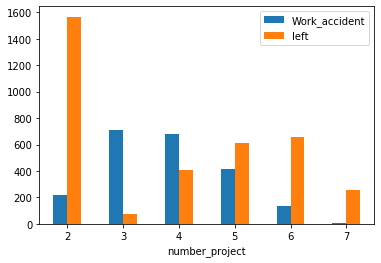

In [9]:
dd = data[['sales','average_montly_hours','number_project']].groupby(['sales','number_project']).mean().reset_index()
dd_p = dd.pivot_table( index = 'sales',
                       columns = 'number_project', 
                       values='average_montly_hours').fillna(0).applymap(float)
dd_p.plot(rot=90)

dod = data[['Work_accident','number_project','left']].groupby(['number_project']).sum().reset_index()
dod.plot(kind='bar', x='number_project', y=['Work_accident','left'], rot=0)


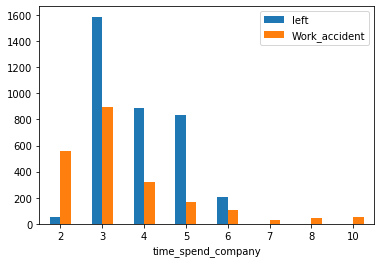

In [37]:
# Гипотеза №1 . Увольняются чаще работники, которые работают в компании отностилельно недавно. 

dod = data[['time_spend_company','left','Work_accident']].groupby(['time_spend_company']).sum().reset_index()
dod.plot(kind='bar', x='time_spend_company', y=['left','Work_accident'], rot=0)

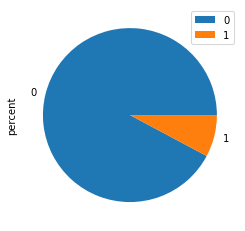

In [48]:
# Гипотеза №2 . Причиной уволнения служат несчастные случаи на рабочем месте.

dd = data[['left','Work_accident']].loc[data.Work_accident == 1].groupby('left').sum().reset_index().head()
dd['percent'] =  (dd['Work_accident'] / np.sum(dd['Work_accident'])) * 100
dd['left'] = dd['left'].replace(0, 'Work')
dd['left'] = dd['left'].replace(1, 'Left')
dd.plot(kind='pie', x='left', y='percent')

# Гипотезу можно считать не верной. Потому, что из 2169 случаев с "Несчастными случаеми" уволилось уволилось только 7,7%